In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from pprint import pprint
import requests
import pandas as pd
import pprint

### Scraping for Google Stock

In [2]:
def scrape_headlines(stock_name):
    url = "https://finviz.com/quote.ashx?t=" + stock_name

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    html_tables =[]

    data = soup.find(id='news-table')
    html_tables.append(data)

    parsed_news = []
    for news_table in html_tables:
        for x in news_table.findAll('tr'):
            text = x.get_text() 
            date_scrape = x.td.text.split()
            if len(date_scrape) == 1:
                time = date_scrape[0]
            else:
                date = date_scrape[0]
                time = date_scrape[1]

            parsed_news.append([date, time, x.a.text])

    print('Number of headlines scraped:', len(parsed_news))
    pprint.pprint(parsed_news[:3])
    return parsed_news

### Sentiment Analysis using Vader Sentiment

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [11]:
def get_vader_scores(parsed_news):
    columns = ['date', 'time', 'headline']
    scored_news = pd.DataFrame(parsed_news,columns=columns)
    scores = [vader.polarity_scores(news[2]) for news in parsed_news]
    scores_df = pd.DataFrame(scores)
    scored_news = scored_news.join(scores_df)

    scored_news['date'] = pd.to_datetime(scored_news.date).dt.date
    print('Data with sentiment scores:')
    display(scored_news.head())
    grouped_by_days = pd.DataFrame(scored_news.drop(columns = ['time','headline','neg','neu','pos']).groupby(['date'])['compound'].mean())
    grouped_by_days['compound'].plot()
    plt.xticks(rotation = 45)
    return scored_news

### Plot of sentiments over time

In [14]:
def get_plot_for_stock(stock):
    parsed_news = scrape_headlines(stock)
    scored_news = get_vader_scores(parsed_news) 
    return

Number of headlines scraped: 100
[['Oct-16-19',
  '03:36AM',
  'Huawei Defies U.S. Ban With Strong Growth in Smartphone Sales'],
 ['Oct-16-19', '02:03AM', 'Googles Pixel Gets Unorthodox Zoom From AI'],
 ['Oct-16-19',
  '01:02AM',
  'Marijuana stocks, after declines of over 50%, are now only ludicrously '
  'overpriced']]
Data with sentiment scores:


,date,time,headline,compound,neg,neu,pos
0,2019-10-16,03:36AM,Huawei Defies U.S. Ban With Strong Growth in S...,0.3182,0.218,0.424,0.358
1,2019-10-16,02:03AM,Googles Pixel Gets Unorthodox Zoom From AI,0.0000,0.000,1.000,0.000
2,2019-10-16,01:02AM,"Marijuana stocks, after declines of over 50%, ...",-0.0516,0.098,0.902,0.000
3,2019-10-16,12:45AM,$30 Billion of Proof That India's Tech Scene I...,0.0000,0.000,1.000,0.000
4,2019-10-15,09:56PM,House investigators say they have begun receiv...,0.0000,0.000,1.000,0.000


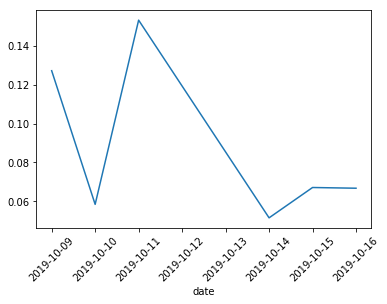

In [15]:
get_plot_for_stock('googl')

Number of headlines scraped: 100
[['Oct-15-19',
  '05:22PM',
  "Oil &amp; Gas Stock Roundup: ConocoPhillips' Australia Asset Sale, Phillips "
  "66's Buyback &amp; More"],
 ['Oct-15-19',
  '01:00PM',
  'Why Royal Dutch Shell Stock Could Stand Out From Big Oil'],
 ['Oct-15-19',
  '09:35AM',
  "3 Stocks Poised to Gain From India's $60B Investment in Gas"]]
Data with sentiment scores:


,date,time,headline,compound,neg,neu,pos
0,2019-10-15,05:22PM,Oil &amp; Gas Stock Roundup: ConocoPhillips' A...,0.3612,0.0,0.839,0.161
1,2019-10-15,01:00PM,Why Royal Dutch Shell Stock Could Stand Out Fr...,0.0000,0.0,1.000,0.000
2,2019-10-15,09:35AM,3 Stocks Poised to Gain From India's $60B Inve...,0.6597,0.0,0.597,0.403
3,2019-10-14,11:07AM,TOTAL to Gain From Adani Venture as India Inve...,0.5267,0.0,0.764,0.236
4,2019-10-14,10:12AM,"Stock Market News For Oct 14, 2019",0.0000,0.0,1.000,0.000


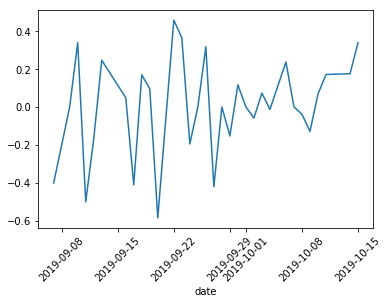

In [16]:
get_plot_for_stock('bp')

Number of headlines scraped: 100
[['Oct-16-19', '02:03AM', 'Googles Pixel Gets Unorthodox Zoom From AI'],
 ['Oct-16-19',
  '02:00AM',
  'Old Mutual Limited Selects AWS as its Preferred Cloud Provider'],
 ['Oct-16-19',
  '01:30AM',
  'Big tech, Twitter bans and Bing: U.S. Democrats spar over Silicon Valley on '
  'debate stage']]
Data with sentiment scores:


,date,time,headline,compound,neg,neu,pos
0,2019-10-16,02:03AM,Googles Pixel Gets Unorthodox Zoom From AI,0.0000,0.000,1.000,0.0
1,2019-10-16,02:00AM,Old Mutual Limited Selects AWS as its Preferre...,-0.2263,0.174,0.826,0.0
2,2019-10-16,01:30AM,"Big tech, Twitter bans and Bing: U.S. Democrat...",0.0000,0.000,1.000,0.0
3,2019-10-16,01:02AM,"Marijuana stocks, after declines of over 50%, ...",-0.0516,0.098,0.902,0.0
4,2019-10-16,12:00AM,"You dont live with us, so you dont know us",0.0000,0.000,1.000,0.0


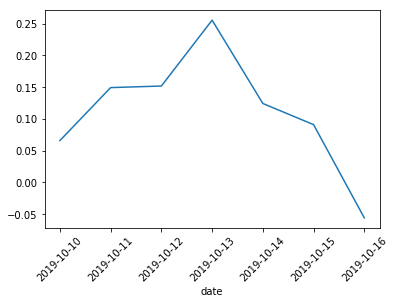

In [17]:
get_plot_for_stock('amzn')

In [ ]:
# random forest classifier

In [ ]:
# google prices over 8 days -> target variable